Unsurpevised 

In [27]:
import numpy
print(numpy.__version__)


1.26.4


In [28]:
import numpy as np 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

In [6]:

# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

In [9]:
# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
Total params: 105392 (411.69 KB)
Trainable params: 105392 (411.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
)

Epoch 1/25

235/235 [==============================] - 5s 11ms/step - loss: 0.2557 - val_loss: 0.1746
Epoch 2/25
235/235 [==============================] - 2s 10ms/step - loss: 0.1572 - val_loss: 0.1410
Epoch 3/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1338 - val_loss: 0.1263
Epoch 4/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1236 - val_loss: 0.1184
Epoch 5/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1175 - val_loss: 0.1133
Epoch 6/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1131 - val_loss: 0.1096
Epoch 7/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1101 - val_loss: 0.1074
Epoch 8/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1078 - val_loss: 0.1048
Epoch 9/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1055 - val_loss: 0.1031
Epoch 10/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1042 - val_loss: 0.1

313/313 [==============================] - 1s 3ms/step


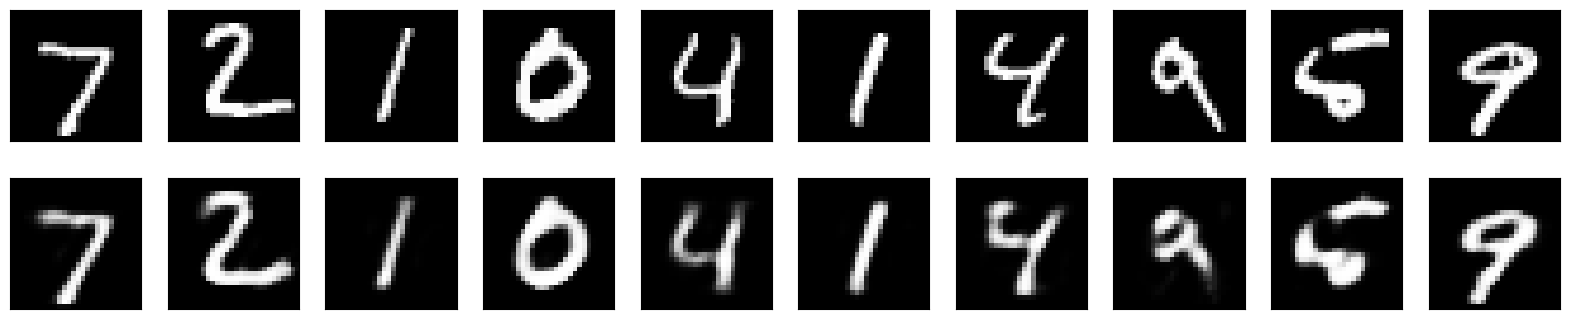

In [11]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()

YOLO !

In [ ]:
import torch
import torchvision

print("torch version:", torch.__version__)
print("torchvision version:", torchvision.__version__)
print("CUDA disponible:", torch.cuda.is_available())


In [4]:
import os
import torch
print(torch.__version__)
from ultralytics import YOLO

2.2.0+cu118


In [2]:
print(torch.cuda.is_available())  # Esto devuelve True si hay GPU con CUDA
print(torch.cuda.device_count())  # Número de GPUs detectadas
print(torch.cuda.get_device_name(0))  # Nombre de la primera GPU (si existe)
print(torch.version.cuda)  # Versión de CUDA que PyTorch está usando


True
1
NVIDIA GeForce RTX 3050 Laptop GPU
11.8


In [ ]:
model = YOLO('yolov8n.pt')  # O yolov8s.pt, yolov8m.pt

model.train(
    data=r'day2_files\dataset.yaml',
    imgsz=640,
    epochs=100,
    batch=16,
    device=0  # O 'cpu'
)


Ultralytics 8.3.160  Python-3.10.18 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=day2_files\dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train13, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

train: Scanning C:\Users\yourk\Documents\3.Universitat\Taller_Ingenieria\day2_files\Images\Train... 0 images, 749 backgrounds, 0 corrupt: 100%|██████████| 749/749 [00:01<00:00, 387.09it/s]

WARNING train: No labels found in C:\Users\yourk\Documents\3.Universitat\Taller_Ingenieria\day2_files\Images\Train.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


train: New cache created: C:\Users\yourk\Documents\3.Universitat\Taller_Ingenieria\day2_files\Images\Train.cache
WARNING Labels are missing or empty in C:\Users\yourk\Documents\3.Universitat\Taller_Ingenieria\day2_files\Images\Train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: Fast image access  (ping: 1.00.3 ms, read: 5.53.2 MB/s, size: 217.5 KB)


val: Scanning C:\Users\yourk\Documents\3.Universitat\Taller_Ingenieria\day2_files\Images\Val... 0 images, 200 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 245.46it/s]

WARNING val: No labels found in C:\Users\yourk\Documents\3.Universitat\Taller_Ingenieria\day2_files\Images\Val.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: New cache created: C:\Users\yourk\Documents\3.Universitat\Taller_Ingenieria\day2_files\Images\Val.cache


WARNING Labels are missing or empty in C:\Users\yourk\Documents\3.Universitat\Taller_Ingenieria\day2_files\Images\Val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
Plotting labels to runs\detect\train13\labels.jpg... 
WARNING zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train13
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.15G          0      101.1          0          0        640: 100%|██████████| 47/47 [00:17<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.13G          0      68.82          0          0        640: 100%|██████████| 47/47 [00:12<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.15G          0      50.49          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.14G          0      36.65          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.14G          0       21.8          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.15G          0      11.95          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.13G          0      6.044          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.14G          0      2.822          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.11it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.14G          0       1.23          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.91it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.15G          0     0.5074          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.93it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.13G          0     0.1964          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.18it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.14G          0    0.07167          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.06it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.14G          0    0.02732          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.90it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.15G          0    0.01516          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.04it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.13G          0   0.009769          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.01it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.14G          0   0.004733          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.92it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.14G          0   0.003535          0          0        640: 100%|██████████| 47/47 [00:12<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.70it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.15G          0   0.003226          0          0        640: 100%|██████████| 47/47 [00:14<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.67it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.13G          0   0.003013          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.90it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.14G          0    0.00284          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.14G          0   0.002692          0          0        640: 100%|██████████| 47/47 [00:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.81it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.15G          0     0.0026          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.94it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.13G          0   0.002444          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.60it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.14G          0   0.002204          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.10it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.14G          0    0.00165          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.19it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.15G          0   0.001064          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.80it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.13G          0  0.0008122          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.13it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.14G          0  0.0007497          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.00it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.14G          0  0.0006991          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.15G          0  0.0006323          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.80it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.13G          0  0.0005537          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.90it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.14G          0  0.0004832          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.75it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.14G          0  0.0004421          0          0        640: 100%|██████████| 47/47 [00:12<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.15G          0  0.0004041          0          0        640: 100%|██████████| 47/47 [00:11<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.98it/s]

                   all        200          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels



c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\ultralytics\utils\metrics.py:765: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
c:\Users\yourk\.conda\envs\r_foam\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.01G          0  0.0003991          0          0        640:  64%|██████▍   | 30/47 [00:07<00:03,  4.29it/s]